IMPORTING LIBRARIES AND DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("50_Startups.csv")
df.head(5)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


NUMERICAL OR STATISTICAL ANALYSIS OF DATASET

In [2]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


SCHEMA OF DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


WE CAN SEE THAT ALL OUR THREE COLUMNS HAVE A DIRECT RELATIONSHIP WITH THE PROFIT, WHICH IS THE TARGET VARIABLE.

In [4]:
c=df.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


CORRELATION MATRIX-DIRECT COORELATION WITH THE PROFIT AND HOW IT IS SHOWN IN THE HEATMAP OF THE CORRELATION PLOT.

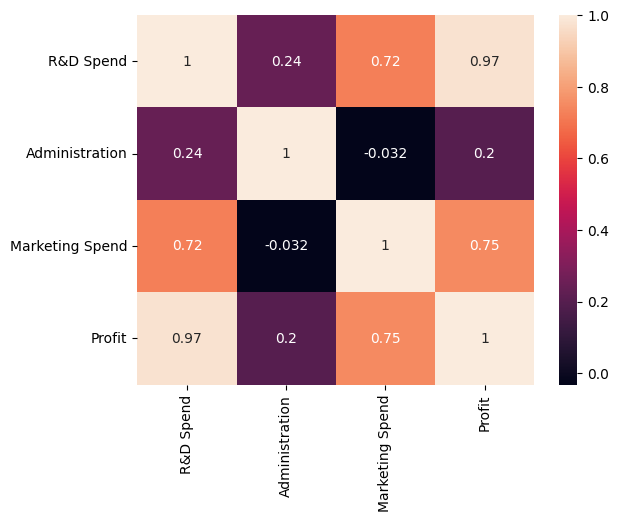

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.show()

ORDINARY LEAST SQUARED MODEL SINCE R-SQUARED VALUE DETERMINES THAT HOW THE REGRESSION PREDICTIONS APPROXIMATE TO THE REAL DATA POINTS, SINCE THE RESPECTIVE VALUE IS 0.951 WHICH MEANS IT IS CLOSE TO PERFECTLY FIT DATA.

In [6]:
import statsmodels.api as sm
y=df['Profit']
x=df[['R&D Spend','Administration','Marketing Spend']]
x=sm.add_constant(x)
lmr=sm.OLS(y,x).fit()
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        17:49:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OUTLIERS DETECTION IN THE TARGET VARIABLE

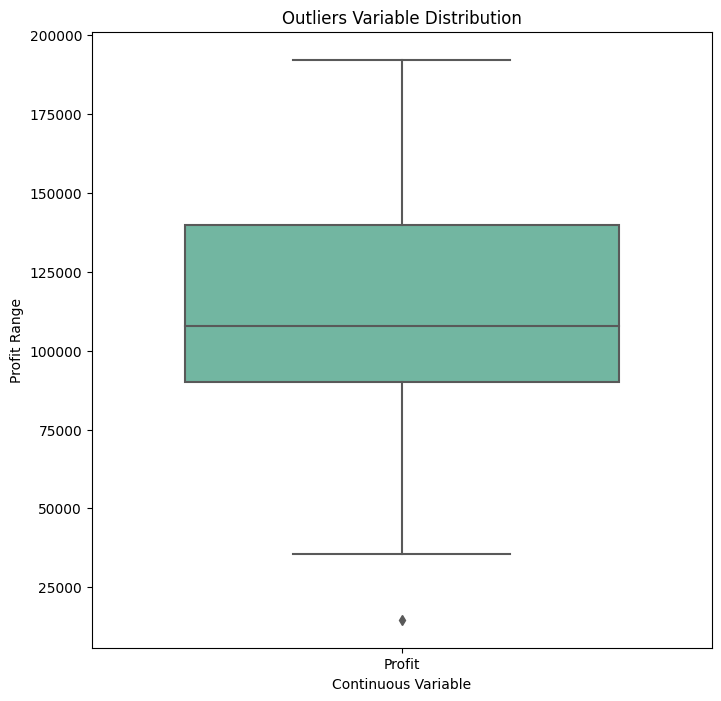

In [7]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot ,
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

HISTOGRAM ON PROFIT- THE AVERAGE PROFIT(100K) IS THE MOST FREQUENT

<ipython-input-8-ade754d9b93b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'],bins=5,kde=True)


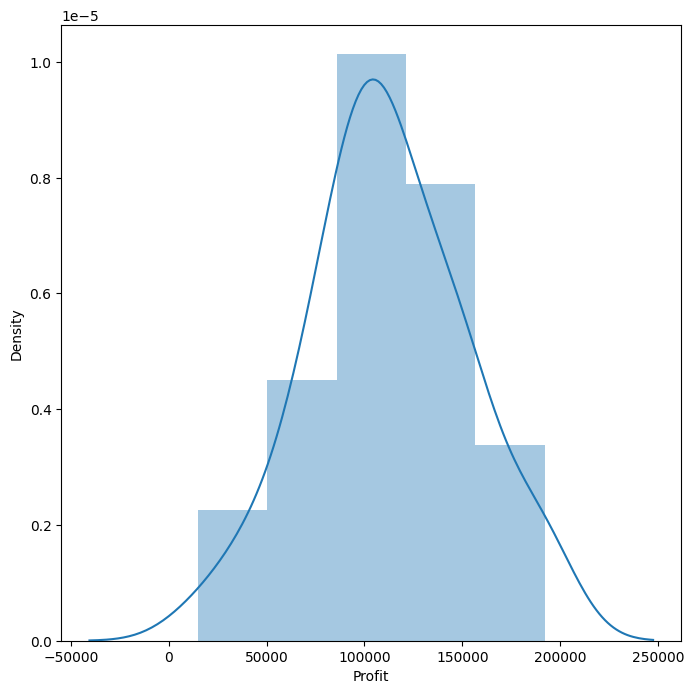

In [8]:
sns.distplot(df['Profit'],bins=5,kde=True)
plt.show()

PAIR PLOT

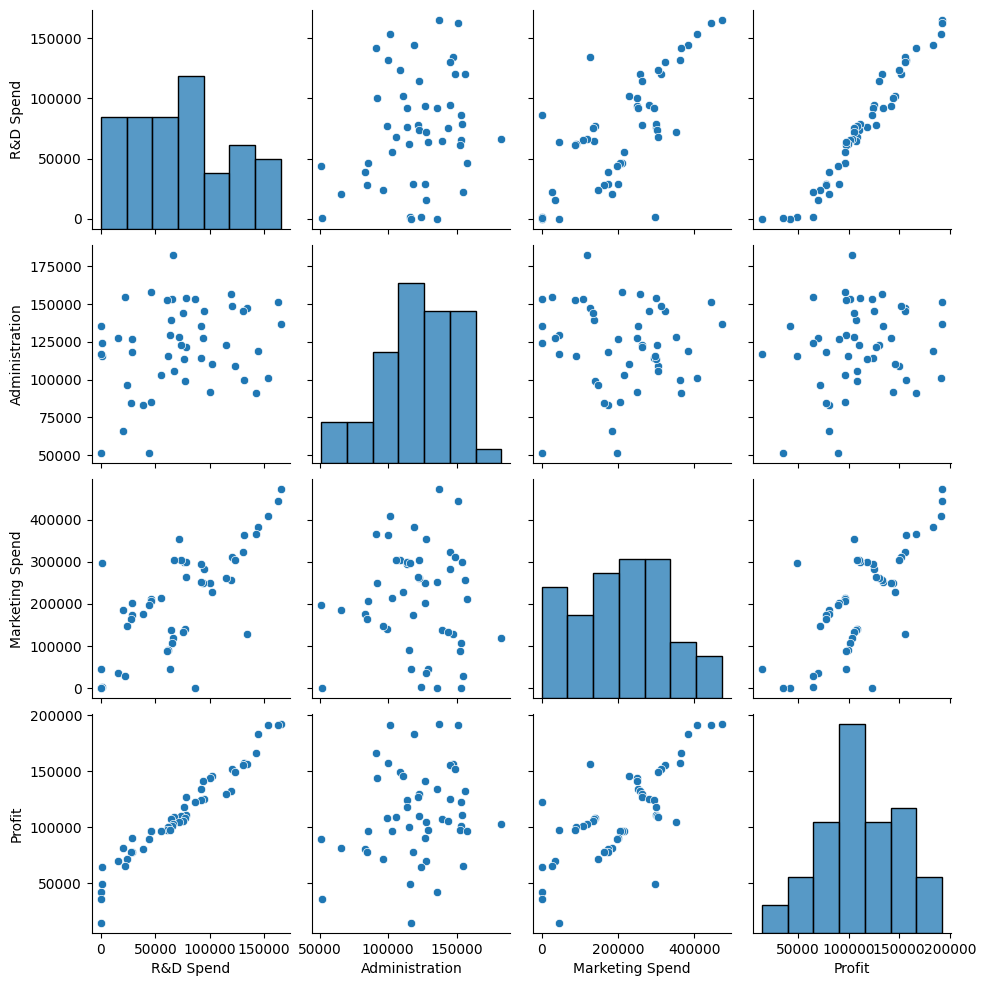

In [9]:
sns.pairplot(df)
plt.show()

CALCULATION OF REGRESSION METRICES

In [10]:
from sklearn.linear_model import LinearRegression
y=df['Profit']
x=df[['R&D Spend','Administration', 'Marketing Spend']]
lm2= LinearRegression().fit(x,y)
intercept=lm2.intercept_
coef=lm2.coef_
print(f"Intercept: {intercept}")
print(f"coeff.: {coef}")
R2= lm2.score(x,y)
print(f"coefficient of determination: {R2}")

Intercept: 50122.19298986524
coeff.: [ 0.80571505 -0.02681597  0.02722806]
coefficient of determination: 0.9507459940683246


1)DIVIDING THE DATA INTRO TRAIN SET(80 PERCENT) AND TEST SET(20 PERCENT)  
2)CALCULATING REGRESSION METRICES
3)CALCULATING ACTUAL AND PREDICTED DATA

In [11]:
seed=42
from sklearn.model_selection import train_test_split
y=df['Profit']
x=df[['R&D Spend','Administration', 'Marketing Spend']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=seed)
lm2= LinearRegression().fit(x_train,y_train)
intercept=lm2.intercept_
coef=lm2.coef_
print(f"Intercept: {intercept}")
print(f"coeff.: {coef}")
R2= lm2.score(x_train,y_train)
print(f"coefficient of determination: {R2*100}")

y_pred= lm2.predict(x_test)
results= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)



Intercept: 54071.87574599082
coeff.: [ 0.80377928 -0.06792917  0.03124155]
coefficient of determination: 95.35927757257411
       Actual      Predicted
13  134307.35  126703.027165
39   81005.76   84894.750816
30   99937.59   98893.418160
45   64926.08   46501.708150
17  125370.37  129128.397344
48   35673.41   50992.694863
26  105733.54  109016.553658
25  107404.34  100878.464145
32   97427.84   97700.596386
19  122776.86  113106.152922


CALCULATION OF ERROR ON ABOVE MODEL

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Squarred Error is : 8092632122.295157
Root Mean Squarred Error is :  899590.5803361415
Mean Absolute Error is : 6979.152252370402


REGRESSION MODEL ON R&D SPEND AND PROFIT AS TARGET VARIABLE(SINCE R SQUARED VALUE IS 0.94 THERE IS HIGH CORRLEATION)

[49032.89914125]
[[0.85429137]]
coefficient of determination :- 0.9465353160804393


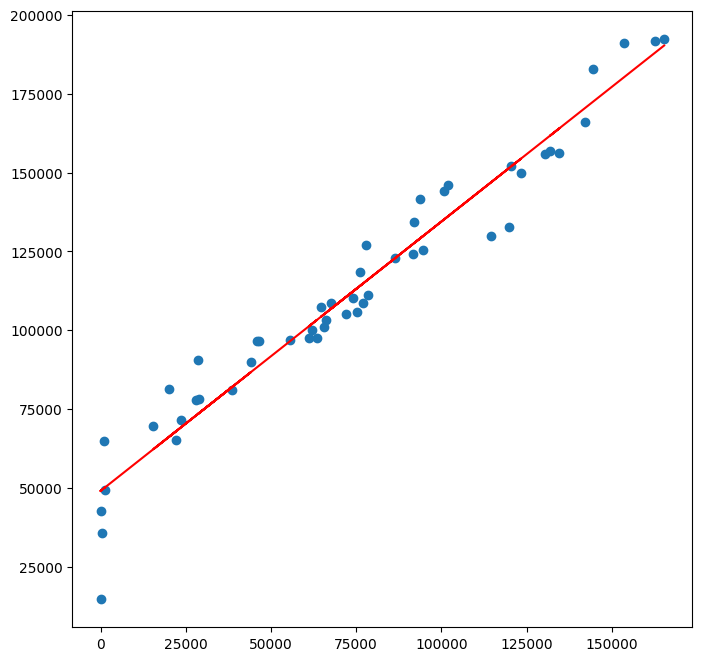

In [13]:
from sklearn.linear_model import LinearRegression

x = df["R&D Spend"].values.reshape(-1,1)
y  = df["Profit"].values.reshape(-1,1)
lem = LinearRegression().fit(x,y)

Intercept = lem.intercept_
Coeff = lem.coef_
print(Intercept)
print(Coeff)
R2 = lem.score(x,y)
print(f"coefficient of determination :- {R2}")
y_pred = lem.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show()

REGRESSION MODEL ON ADMINISTRATION AND PROFIT AS TARGET VARIABLE (SINCE R SQUARED VALUE IS 0.04 THERE IS NO LINEAR CORRELATION)

[76974.47130542]
[[0.2887492]]
coefficient of determination :- 0.04028714077757223


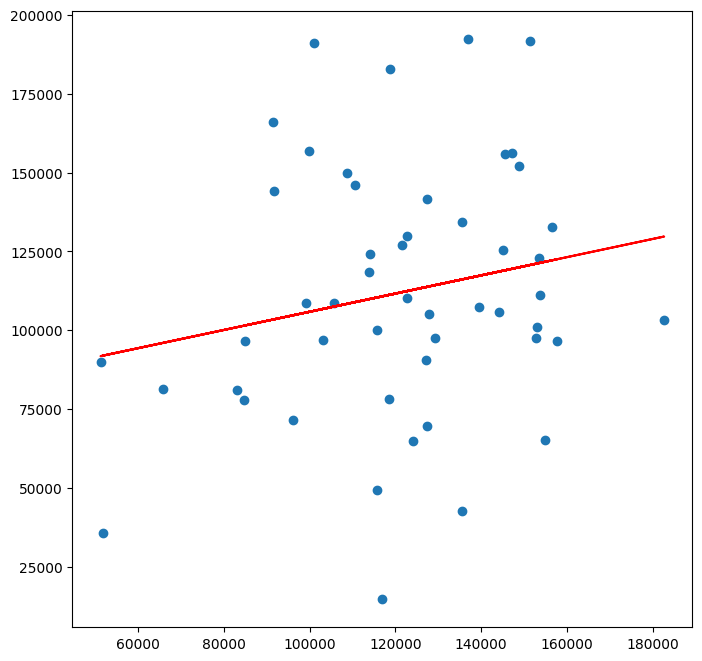

In [14]:
from sklearn.linear_model import LinearRegression

x = df["Administration"].values.reshape(-1,1)
y  = df["Profit"].values.reshape(-1,1)
lem = LinearRegression().fit(x,y)

Intercept = lem.intercept_
Coeff = lem.coef_
print(Intercept)
print(Coeff)
R2 = lem.score(x,y)
print(f"coefficient of determination :- {R2}")
y_pred = lem.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show()

REGRESSION MODEL ON MARKETING SPEND AND PROFIT AS TARGET VARIABLE(SINCE R SQUARED VALUE IS 0.55 THERE IS MODERATE LINEAR CORRELATION)

[60003.54881577]
[[0.24645926]]
coefficient of determination :- 0.5591535746115515


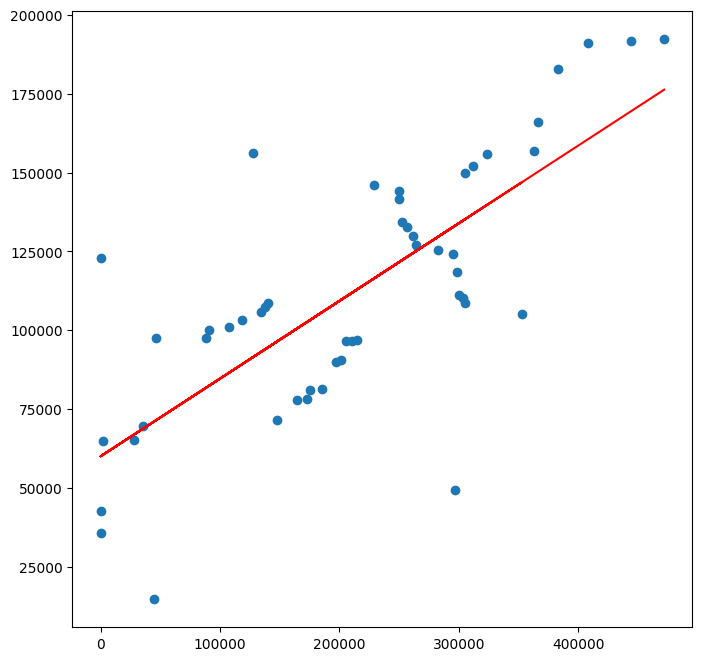

In [17]:
from sklearn.linear_model import LinearRegression

x = df["Marketing Spend"].values.reshape(-1,1)
y  = df["Profit"].values.reshape(-1,1)
lem = LinearRegression().fit(x,y)

Intercept = lem.intercept_
Coeff = lem.coef_
print(Intercept)
print(Coeff)
R2 = lem.score(x,y)
print(f"coefficient of determination :- {R2}")
y_pred = lem.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show()

BEST MODEL

The best model is LINEAR REGRESSION, also known as ordinary least squares (OLS) and linear least squares, is the real workhorse of the regression world. We can use linear regression to understand the mean change in a dependent variable given a one-unit change in each independent variable.Sincce the R squared value of our model is 0.951 which is close to 1 and hence the data fit well in this regression model.As high r squared is good for the regression model. Here we also see that
R&D spend with profit as target variable shows the highest correlation.